In [30]:
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import os
df = pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


## Check Description of Each Column

In [31]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [32]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [33]:
df['Year'].min()

1960

In [34]:
df['Year'].max()

2016

## Analysing Arab World

In [35]:
df_pr = df[df['Country Name'] == 'Arab World']

<Axes: xlabel='YEARS', ylabel='GDP'>

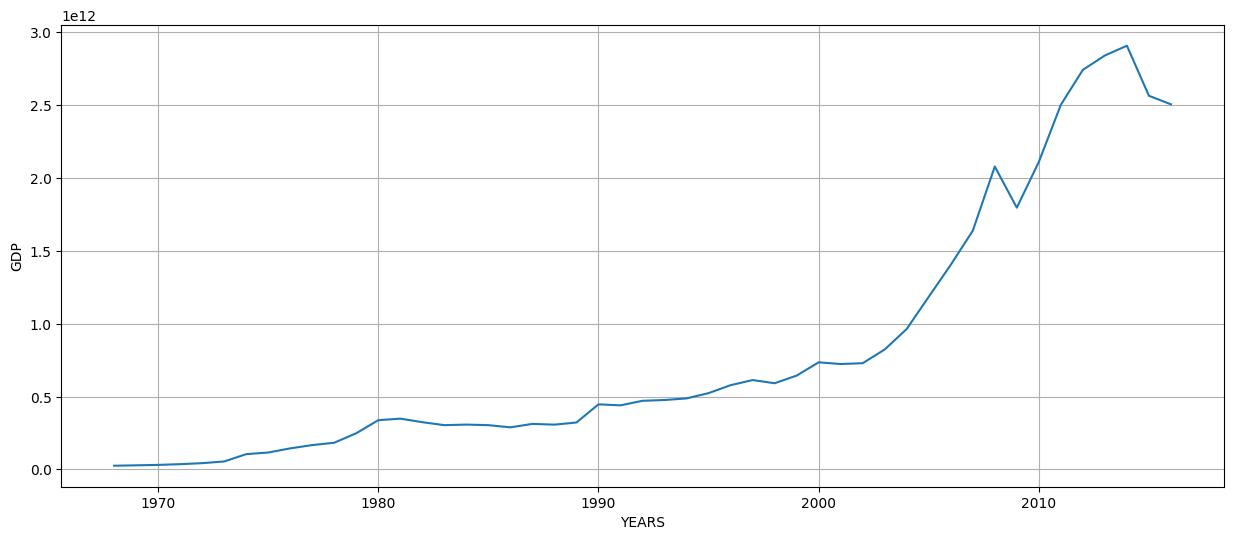

In [36]:
df_pr.plot(kind = 'line', x = 'Year', y = 'Value',
           figsize = (15,6),
           legend = False,
           grid = True,
           ylabel = 'GDP',
           xlabel = 'YEARS')

In [37]:
df_pr

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
5,Arab World,ARB,1973,5.501839e+10
6,Arab World,ARB,1974,1.051458e+11
7,Arab World,ARB,1975,1.163370e+11
8,Arab World,ARB,1976,1.448462e+11
9,Arab World,ARB,1977,1.673083e+11


### GDP Growth on Whole Data

In [38]:
df.head()


,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


### Finding GDP Growth of a country

In [39]:
df_pr = df[df['Country Name'] == 'Arab World']

data = df_pr.values

gdp_change = [0]

for i in range(1,len(data)):
    
    prev = data[i-1][3]
    cur = data[i][3]
    
    gdp_change.append(round(((cur - prev) / prev)*100,2))
    
df_pr = df_pr.assign(GDP = gdp_change)

### GDP Growth of Every Country

In [40]:
final_data = []

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)

In [41]:
df = pd.concat(final_data, axis = 0)

In [42]:
df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [43]:
df.groupby('Country Name').max()['Value'].sort_values(ascending = False).head(50)

Country Name
World                                                   7.904923e+13
High income                                             5.036240e+13
OECD members                                            4.937008e+13
Post-demographic dividend                               4.673504e+13
IDA & IBRD total                                        2.948247e+13
Low & middle income                                     2.870476e+13
Middle income                                           2.829277e+13
IBRD only                                               2.739661e+13
Europe & Central Asia                                   2.365470e+13
East Asia & Pacific                                     2.248043e+13
Upper middle income                                     2.221220e+13
North America                                           2.016030e+13
Late-demographic dividend                               1.970310e+13
European Union                                          1.913667e+13
United States        

### Ploting Grapgh using Plotly

In [44]:
final_data = []

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)
    
df = pd.concat(final_data, axis = 0)

In [45]:
df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [46]:
df_pr = df[df['Country Name'] == 'World']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis')

fig

In [47]:
pyo.plot(fig, filename = 'World GDP.html')

'World GDP.html'

In [48]:
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'Indian GDP Analysis')


pyo.plot(fig, filename = 'India.html')


'India.html'

In [49]:
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'Indian GDP Analysis', range_y = [0, 4000000000000])

fig

In [50]:
final_data = []

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):
        prev = data[i-1][3]
        cur = data[i][3]
        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)
    
df = pd.concat(final_data, axis = 0)

df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


### GDP of Each Country

In [51]:
## Creating file GDP INDIVIDUAL if this file created and available then comment this code other wise run this code

if not os.path.exists('GDP Individual'):
    os.mkdir('GDP Individual')

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis')
    pyo.plot(fig, filename = 'GDP Individual/' + country_name + '.html', auto_open = False)

### GDP of Each Country WRT 80T

In [52]:
## Creating file GDP INDIVIDUAL if this file created and available then comment this code other wise run this code

if not os.path.exists('GDP Individual WRT World'):
    os.mkdir('GDP Individual WRT World')

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis', range_y = [0,80000000000000])
    pyo.plot(fig, filename = 'GDP Individual WRT World/' + country_name + '.html', auto_open = False)

### Compared GDP across Countries

In [53]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'GDP Analysis of All Countries', color = 'Country Name')

pyo.plot(fig, filename = 'Countries GDP.html')

'Countries GDP.html'

GDP Comparision Between india & China

In [54]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'India']

In [55]:
c2.head()

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64


In [56]:
df_pr = pd.concat([c1,c2],axis = 0)

In [57]:
df_pr

,Country Name,Country Code,Year,Value,GDP
4046,China,CHN,1960,5.971647e+10,0.00
4047,China,CHN,1961,5.005687e+10,-16.18
4048,China,CHN,1962,4.720936e+10,-5.69
4049,China,CHN,1963,5.070680e+10,7.41
4050,China,CHN,1964,5.970834e+10,17.75
...,...,...,...,...,...
6126,India,IND,2012,1.827638e+12,0.25
6127,India,IND,2013,1.856722e+12,1.59
6128,India,IND,2014,2.035393e+12,9.62
6129,India,IND,2015,2.089865e+12,2.68


In [58]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | India & China', color = 'Country Name')

pyo.plot(fig, filename = 'IND_CHN.html')

'IND_CHN.html'

In [59]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'World']

df_pr = pd.concat([c1,c2],axis = 0)

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | World & China', color = 'Country Name')

pyo.plot(fig, filename = 'WLD_CHN.html')

'WLD_CHN.html'

### GDP comparision between specific countries

In [60]:
lst = ['IND','ITA', 'USA', 'CHN']

dfs = []
for i in lst:
    dfs.append(df[df['Country Code'] == i])
    
    df_pr = pd.concat(dfs, axis = 0)

In [61]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), color = 'Country Name')

# Replace invalid characters in the filename
filename = '_'.join(lst) + '.html'
pyo.plot(fig, filename = filename)

'IND_ITA_USA_CHN.html'

In [62]:
def comare_gdp(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), 
                  color = 'Country Name')
    pyo.plot(fig, filename = '|'.join(lst) + '.html', auto_open = isOpen)

In [63]:
def comare_gdp(lst, isOpen):
	dfs = []
	for i in lst:
		dfs.append(df[df['Country Code'] == i])
	df_pr = pd.concat(dfs, axis = 0)
	
	fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), 
				  color = 'Country Name')
	
	# Replace invalid characters in the filename
	filename = '_'.join(lst) + '.html'
	pyo.plot(fig, filename = filename, auto_open = isOpen)

comare_gdp(['IND','USA'], False)

### GDP Growth comparision of all countries

In [64]:
fig = px.line(df, x = 'Year', y = 'GDP', title = 'GDP Comparison', color = 'Country Name')
pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'

### GDP Growth of all countries Grapgh Individual

In [66]:
if not os.path.exists('GDP Growth Individual'):
    os.mkdir('GDP Growth Individual')

for country_name in df['Country Code'].unique():

    df_pr = df[df['Country Code'] == country_name]

    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = country_name)
    pyo.plot(fig, filename = 'GDP Growth Individual/' + country_name + '.html', auto_open = False)

GDP Growth between 1960 - 2016

In [67]:
dfs = []

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    
    if (len(df_pr) == 57):
        dfs.append(df_pr)
        
df_pr = pd.concat(dfs, axis = 0)

In [68]:
df_pr

,Country Name,Country Code,Year,Value,GDP
49,Caribbean small states,CSS,1960,2.004785e+09,0.00
50,Caribbean small states,CSS,1961,2.169733e+09,8.23
51,Caribbean small states,CSS,1962,2.289495e+09,5.52
52,Caribbean small states,CSS,1963,2.431592e+09,6.21
53,Caribbean small states,CSS,1964,2.626896e+09,8.03
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [69]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Growth', color = 'Country Name')

pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'